# Reuters

What follows is an example of multiclass classification.
We'll be dividing reuters news wires into 46 different topics.
The reuters dataset comes packaged with Keras.

In [3]:
from keras.datasets import reuters

num_words = 10000

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = num_words)
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
def decode_and_print(sequence):
    word_index = reuters.get_word_index()
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    print(' '.join(
        reverse_word_index.get(i - 3, '?') for i in sequence
    ))
decode_and_print(train_data[0])

550378/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


Let's first vectorise the data in the same way we did in the IMDB exercise.

In [10]:
import numpy as np

def vectorise_sequences(sequences, dimension = num_words):
    # Create an all-zero matrix with a column for each review and num_words rows.
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        # We can set multiple indices in one operation by passing a list (sequence)
        results[i, sequence] = 1. # Note this is a float
    return results

x_train = vectorise_sequences(train_data)
x_test = vectorise_sequences(test_data)
x_train[0]
np.shape(x_train)

(8982, 10000)

We'll also need to vectorise the labels. We'll do this with one-hot encoding, i.e. we'll have a vector of zeros, and there will be one 1 in there corresponding with the label index.
We can do this with to_categorical from keras.

In [11]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
print(one_hot_train_labels[0])
np.shape(one_hot_train_labels)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(8982, 46)

This is very similar to the previous example, but instead of having a single output, we have 46.

When information is dropped in one of the layers we can never recover it, and each layer can potentially become an information bottleneck.

In [15]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (num_words, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

2022-10-24 19:16:27.665421: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 19:16:27.868263: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 19:16:27.868537: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 19:16:27.869629: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
202

Two things to note about this model:

- We're ending on a dense layer of 46, this corresponds wiht the number of categories.
- The last layer uses softmax activaiton, so we'll end with a probability distribution over the 46 different output classes.

In [16]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

Our loss funciton is categorical_corrsentropy, which'll compute the difference between the probability output by the network and the truth.

Now let's again split our training data in a training set and a validation set.

In [18]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

And then train the network for 20 epochs.

In [19]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 2s 29ms/step - loss: 2.6588 - accuracy: 0.5499 - val_loss: 1.7311 - val_accuracy: 0.6510
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4218 - accuracy: 0.7070 - val_loss: 1.3022 - val_accuracy: 0.7190
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0460 - accuracy: 0.7742 - val_loss: 1.1360 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8293 - accuracy: 0.8230 - val_loss: 1.0461 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6603 - accuracy: 0.8606 - val_loss: 0.9786 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5307 - accuracy: 0.8895 - val_loss: 0.9234 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4250 - accuracy: 0.9103 - val_loss: 0.9202 - val_accuracy: 0.8160
Epoch 8/20
16

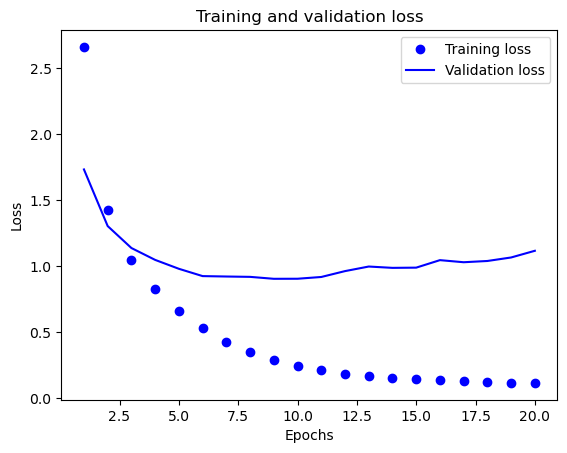

In [20]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss') # bo is blue dot.
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss') # b is blue line.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

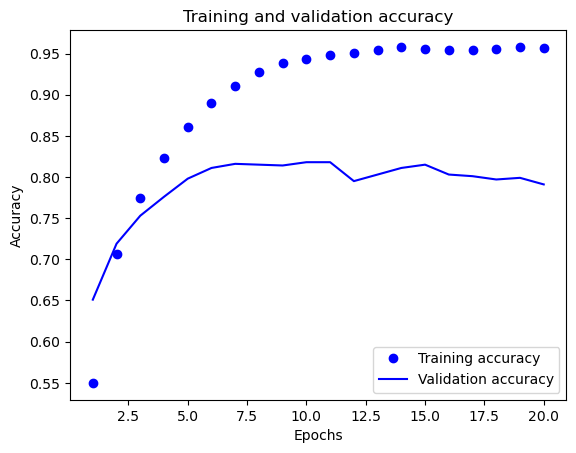

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy') # bo is blue dot.
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy') # b is blue line.
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The model begins to overfit after 9 epochs, so let's re-train it for 9 epochs.

In [22]:
model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 9,
    batch_size = 512,
    validation_data = (x_val, y_val)
)
results = model.evaluate(x_test, one_hot_test_labels)
results

Epoch 1/9
16/16 [==============================] - 0s 21ms/step - loss: 0.1099 - accuracy: 0.9577 - val_loss: 1.1565 - val_accuracy: 0.7900
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 0.1103 - accuracy: 0.9555 - val_loss: 1.1065 - val_accuracy: 0.8030
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 0.1053 - accuracy: 0.9585 - val_loss: 1.1540 - val_accuracy: 0.7980
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.1046 - accuracy: 0.9579 - val_loss: 1.2013 - val_accuracy: 0.7910
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.1030 - accuracy: 0.9584 - val_loss: 1.1954 - val_accuracy: 0.7930
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.0984 - accuracy: 0.9602 - val_loss: 1.1734 - val_accuracy: 0.8000
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.1005 - accuracy: 0.9577 - val_loss: 1.2211 - val_accuracy: 0.7930
Epoch 8/9
16/16 [===

[1.3724478483200073, 0.780053436756134]

In [25]:
# predict
predictions = model.predict(x_test)
np.shape(predictions)

71/71 [==============================] - 0s 2ms/step


(2246, 46)

In [28]:
print(predictions[0])
np.argmax(predictions[0])

[2.90806064e-08 2.34825528e-08 1.92610261e-09 9.99314427e-01
 4.41752345e-04 6.64120148e-10 3.36017568e-11 1.79861727e-05
 1.70715124e-04 7.34485397e-08 4.33833350e-07 6.66933238e-06
 5.37878122e-07 7.50126048e-07 3.14034437e-10 9.95142524e-10
 2.03167406e-06 9.71356107e-10 1.35063050e-09 2.07859557e-05
 6.85063833e-06 3.47445393e-06 3.28306385e-07 1.39188643e-07
 1.16886936e-08 1.33719951e-08 5.11518508e-13 3.86087516e-11
 1.61395849e-06 6.91871094e-08 1.61673370e-07 8.14034262e-09
 1.38701077e-08 1.36085754e-09 6.98016009e-08 1.26641426e-08
 1.07917085e-05 4.62106568e-11 1.34860329e-07 7.58713758e-10
 1.93260874e-09 3.66726494e-09 1.85348178e-12 2.31969222e-09
 3.95762347e-11 2.32619657e-09]


3

Now let's experiment with a net with smaller and larger hidden layers.

Epoch 1/20
16/16 [==============================] - 1s 29ms/step - loss: 2.6731 - accuracy: 0.4820 - val_loss: 1.7362 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.4718 - accuracy: 0.6759 - val_loss: 1.3850 - val_accuracy: 0.6740
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.1650 - accuracy: 0.7339 - val_loss: 1.2652 - val_accuracy: 0.7120
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.9423 - accuracy: 0.7856 - val_loss: 1.1317 - val_accuracy: 0.7490
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.7809 - accuracy: 0.8215 - val_loss: 1.0782 - val_accuracy: 0.7690
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6194 - accuracy: 0.8550 - val_loss: 1.0390 - val_accuracy: 0.7860
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5078 - accuracy: 0.8871 - val_loss: 1.0444 - val_accuracy: 0.7810
Epoch 8/20
16

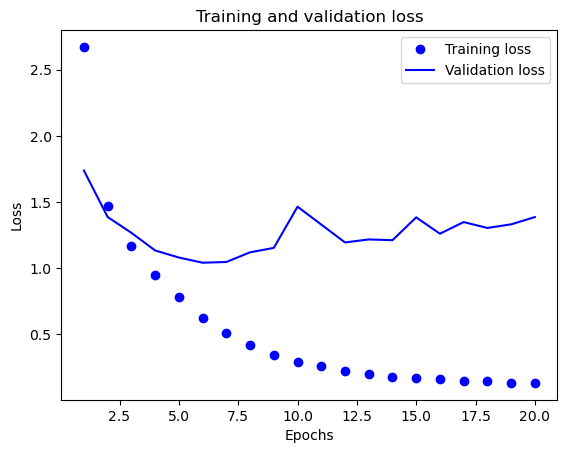

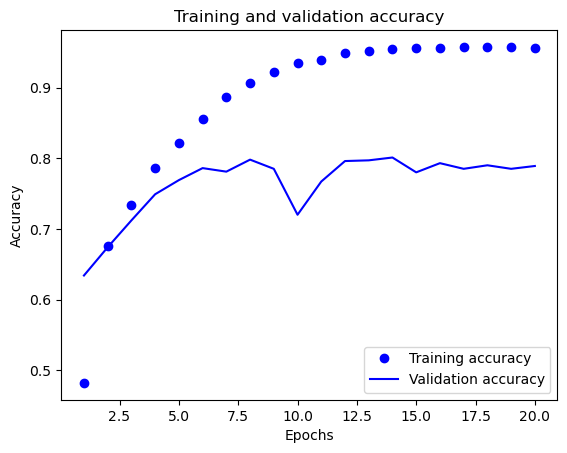

In [34]:
hidden_layer_size = 64
num_layers = 3

from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (num_words, )))
for _ in range(num_layers):
    model.add(layers.Dense(hidden_layer_size, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss') # bo is blue dot.
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss') # b is blue line.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy') # bo is blue dot.
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy') # b is blue line.
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()